<a href="https://colab.research.google.com/github/Calisti-Daniele/Fifa-Youth-Growth-Prediction/blob/main/Fifa_Youth_Growth_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow scikit-learn scikeras

---
# **Perché ho scelto l'algoritmo LSTM 🌟**

L'uso dell'**algoritmo LSTM (Long Short-Term Memory)** per la nostra analisi è strategico e ben motivato.

Ecco perché:

* **Gestione delle sequenze temporali: 📅**
Le LSTM sono progettate per lavorare con dati sequenziali, perfette per il nostro dataset che contiene statistiche di calciatori nel tempo, dal 2015 al 2023. Questo modello riesce a catturare le dipendenze temporali, analizzando come le performance dei giocatori si evolvono con le diverse versioni di FIFA.

* **Memoria a lungo termine: 💡**
A differenza delle reti neurali tradizionali, le LSTM possono mantenere informazioni significative per lunghi periodi. Questo è fondamentale quando si lavora con dati che mostrano trend e pattern nel tempo, garantendo che le informazioni rilevanti non vengano dimenticate durante l’addestramento.

* **Robustezza alle fluttuazioni: 🔄**
Grazie alla loro architettura, le LSTM sono meno suscettibili al problema del vanishing gradient. Questo significa che possono apprendere da sequenze più lunghe senza perdere di vista le informazioni chiave, offrendo così previsioni più accurate e affidabili.

* **Eccellenza predittiva: 🔮**
Le LSTM sono state ampiamente utilizzate in vari domini, dalla finanza alla traduzione automatica, e hanno dimostrato di eccellere nella previsione di valori futuri. Applicando questo algoritmo alle statistiche dei calciatori, possiamo ottenere previsioni più precise sul loro potenziale e sulle loro performance future.

In sintesi, l’adozione dell’**algoritmo LSTM**- rappresenta un passo fondamentale per la nostra analisi, permettendoci di sfruttare al meglio la ricchezza temporale del nostro dataset e ottenere risultati significativi nel contesto della nostra ricerca. 🚀

---

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


---
# Primo passo: **preprocessing dei dati** 📊

Il **preprocessing dei dati** è un passo cruciale nel progetto, poiché garantisce che i dati siano pronti per l'analisi e l'addestramento del modello. Ecco i dettagli del processo:

* **Analisi Iniziale**: 🧐  
  Prima di tutto, abbiamo caricato il dataset utilizzando `pandas`. Abbiamo eseguito un'analisi iniziale per comprendere la dimensione del dataset, visualizzando le prime righe e ottenendo informazioni generali, comprese le statistiche descrittive. Queste informazioni sono fondamentali per avere un quadro chiaro dei dati disponibili.

* **Gestione dei Valori Nulli**: 🚫  
  Abbiamo controllato la presenza di valori nulli nel dataset. Questi possono influenzare negativamente le prestazioni del modello, quindi abbiamo scelto di sostituire i valori nulli nelle colonne numeriche con la **media** della rispettiva colonna. Questo approccio consente di mantenere intatti i dati senza introdurre distorsioni significative.

* **Normalizzazione dei Dati**: ⚖️  
  La normalizzazione è essenziale per garantire che le variabili abbiano la stessa scala, evitando che alcune feature influenzino eccessivamente il modello. Abbiamo selezionato le colonne numeriche e abbiamo utilizzato `StandardScaler` di `scikit-learn` per normalizzare i dati. Questo processo trasforma le feature affinché abbiano media zero e varianza uno, migliorando così l'efficacia dell'addestramento del modello.

* **Analisi Finale**: 🔍  
  Dopo il preprocessing, abbiamo effettuato un'analisi finale per assicurarci che non ci fossero più valori nulli e per visualizzare le prime righe del dataset preprocessato. Questa fase è importante per confermare che le operazioni di preprocessing siano state eseguite correttamente e che i dati siano pronti per il successivo addestramento del modello.

* **Salvataggio del Dataset**: 💾  
  Infine, abbiamo salvato il dataset preprocessato in un nuovo file CSV, garantendo che i dati preparati fossero facilmente accessibili per le fasi successive del progetto.

---

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carico il dataset
df = pd.read_csv('dataset_fifa_15_23.csv')

# 1. Analisi iniziale
print("Dimensione del dataset:", df.shape)
print("Prime righe del dataset:\n", df.head())
print("Informazioni sul dataset:\n", df.info())
print("Statistiche descrittive:\n", df.describe())

# 2. Gestione dei valori nulli
print("Valori nulli per colonna:\n", df.isnull().sum())

Dimensione del dataset: (113938, 54)
Prime righe del dataset:
                                           player_url   short_name  \
0  https://sofifa.com/player/204346/federico-vico...    Fede Vico   
1  https://sofifa.com/player/204451/koray-gunter/...    K. Günter   
2  https://sofifa.com/player/205618/sandy-walsh/1...     S. Walsh   
3  https://sofifa.com/player/206518/callum-robins...  C. Robinson   
4  https://sofifa.com/player/207593/jere-uronen/1...    J. Uronen   

                long_name player_positions  overall  potential  age  \
0  Federico Vico Villegas  LM, CAM, RM, ST       70         76   23   
1            Koray Günter               CB       70         75   23   
2             Sandy Walsh   RB, CB, CM, LB       70         75   23   
3         Callum Robinson       LM, ST, LW       70         79   23   
4      Jere Juhani Uronen               LB       70         75   23   

   height_cm  weight_kg          club_name  ... defending_marking_awareness  \
0        167    

In [ ]:
# Sostituisco valori nulli con la media
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# 3. Normalizzazione dei dati
# Seleziono le colonne numeriche per la normalizzazione
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()

# Normalizzazione dei dati
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# 4. Analisi finale
print("Dopo il preprocessing:")
print("Valori nulli per colonna:\n", df.isnull().sum())
print("Prime righe del dataset preprocessato:\n", df.head())

print(df.describe())

Dopo il preprocessing:
Valori nulli per colonna:
 player_url                       0
short_name                       0
long_name                        0
player_positions                 0
overall                          0
potential                        0
age                              0
height_cm                        0
weight_kg                        0
club_name                      294
league_name                    294
nationality_name                 0
preferred_foot                   0
shooting                         0
passing                          0
dribbling                        0
defending                        0
physic                           0
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill

---

# Feature Selection 🔍

La **feature selection** è un passaggio fondamentale nel progetto, poiché permette di identificare le variabili più significative che influenzano i target di interesse. Ecco come abbiamo affrontato questa fase:

* **Visualizzazione della Matrice di Correlazione**: 📊  
  Abbiamo utilizzato `seaborn` e `matplotlib` per visualizzare la matrice di correlazione tra le feature selezionate e i target. La matrice di correlazione fornisce un'analisi visiva di come ciascuna variabile è correlata con le altre, facilitando l'identificazione di relazioni significative.

* **Calcolo della Correlazione**: ⚖️  
  Abbiamo calcolato la correlazione tra le colonne delle feature e i target utilizzando il metodo `corr()`. Questo passaggio è cruciale per comprendere come ogni feature contribuisce alla previsione delle statistiche dei calciatori.

* **Selezione delle Feature**: ✅  
  Basandoci sui valori di correlazione ottenuti, abbiamo definito una soglia di correlazione di **0.4**. Questo significa che abbiamo selezionato le feature che mostrano una correlazione assoluta maggiore di 0.4 con almeno uno dei target. Questa soglia ci consente di concentrarci su variabili che hanno un impatto significativo, migliorando l'efficacia del modello.

* **Identificazione delle Feature Selezionate**: 📋  
  Alla fine, abbiamo stampato l'elenco delle feature selezionate, fornendo un chiaro quadro delle variabili che utilizzeremo nel modello. Questo approccio assicura che il modello si concentri sulle feature più rilevanti, ottimizzando così le sue prestazioni.

---

In [ ]:
# Caricamento del dataset
df = pd.read_csv('dataset_fifa_15_23_preprocessed.csv')

# Definizione delle colonne da usare per feature e target
cols_features = ['age', 'height_cm', 'weight_kg', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
                 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
                 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
                 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle',
                 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
cols_targets = ['overall', 'potential']



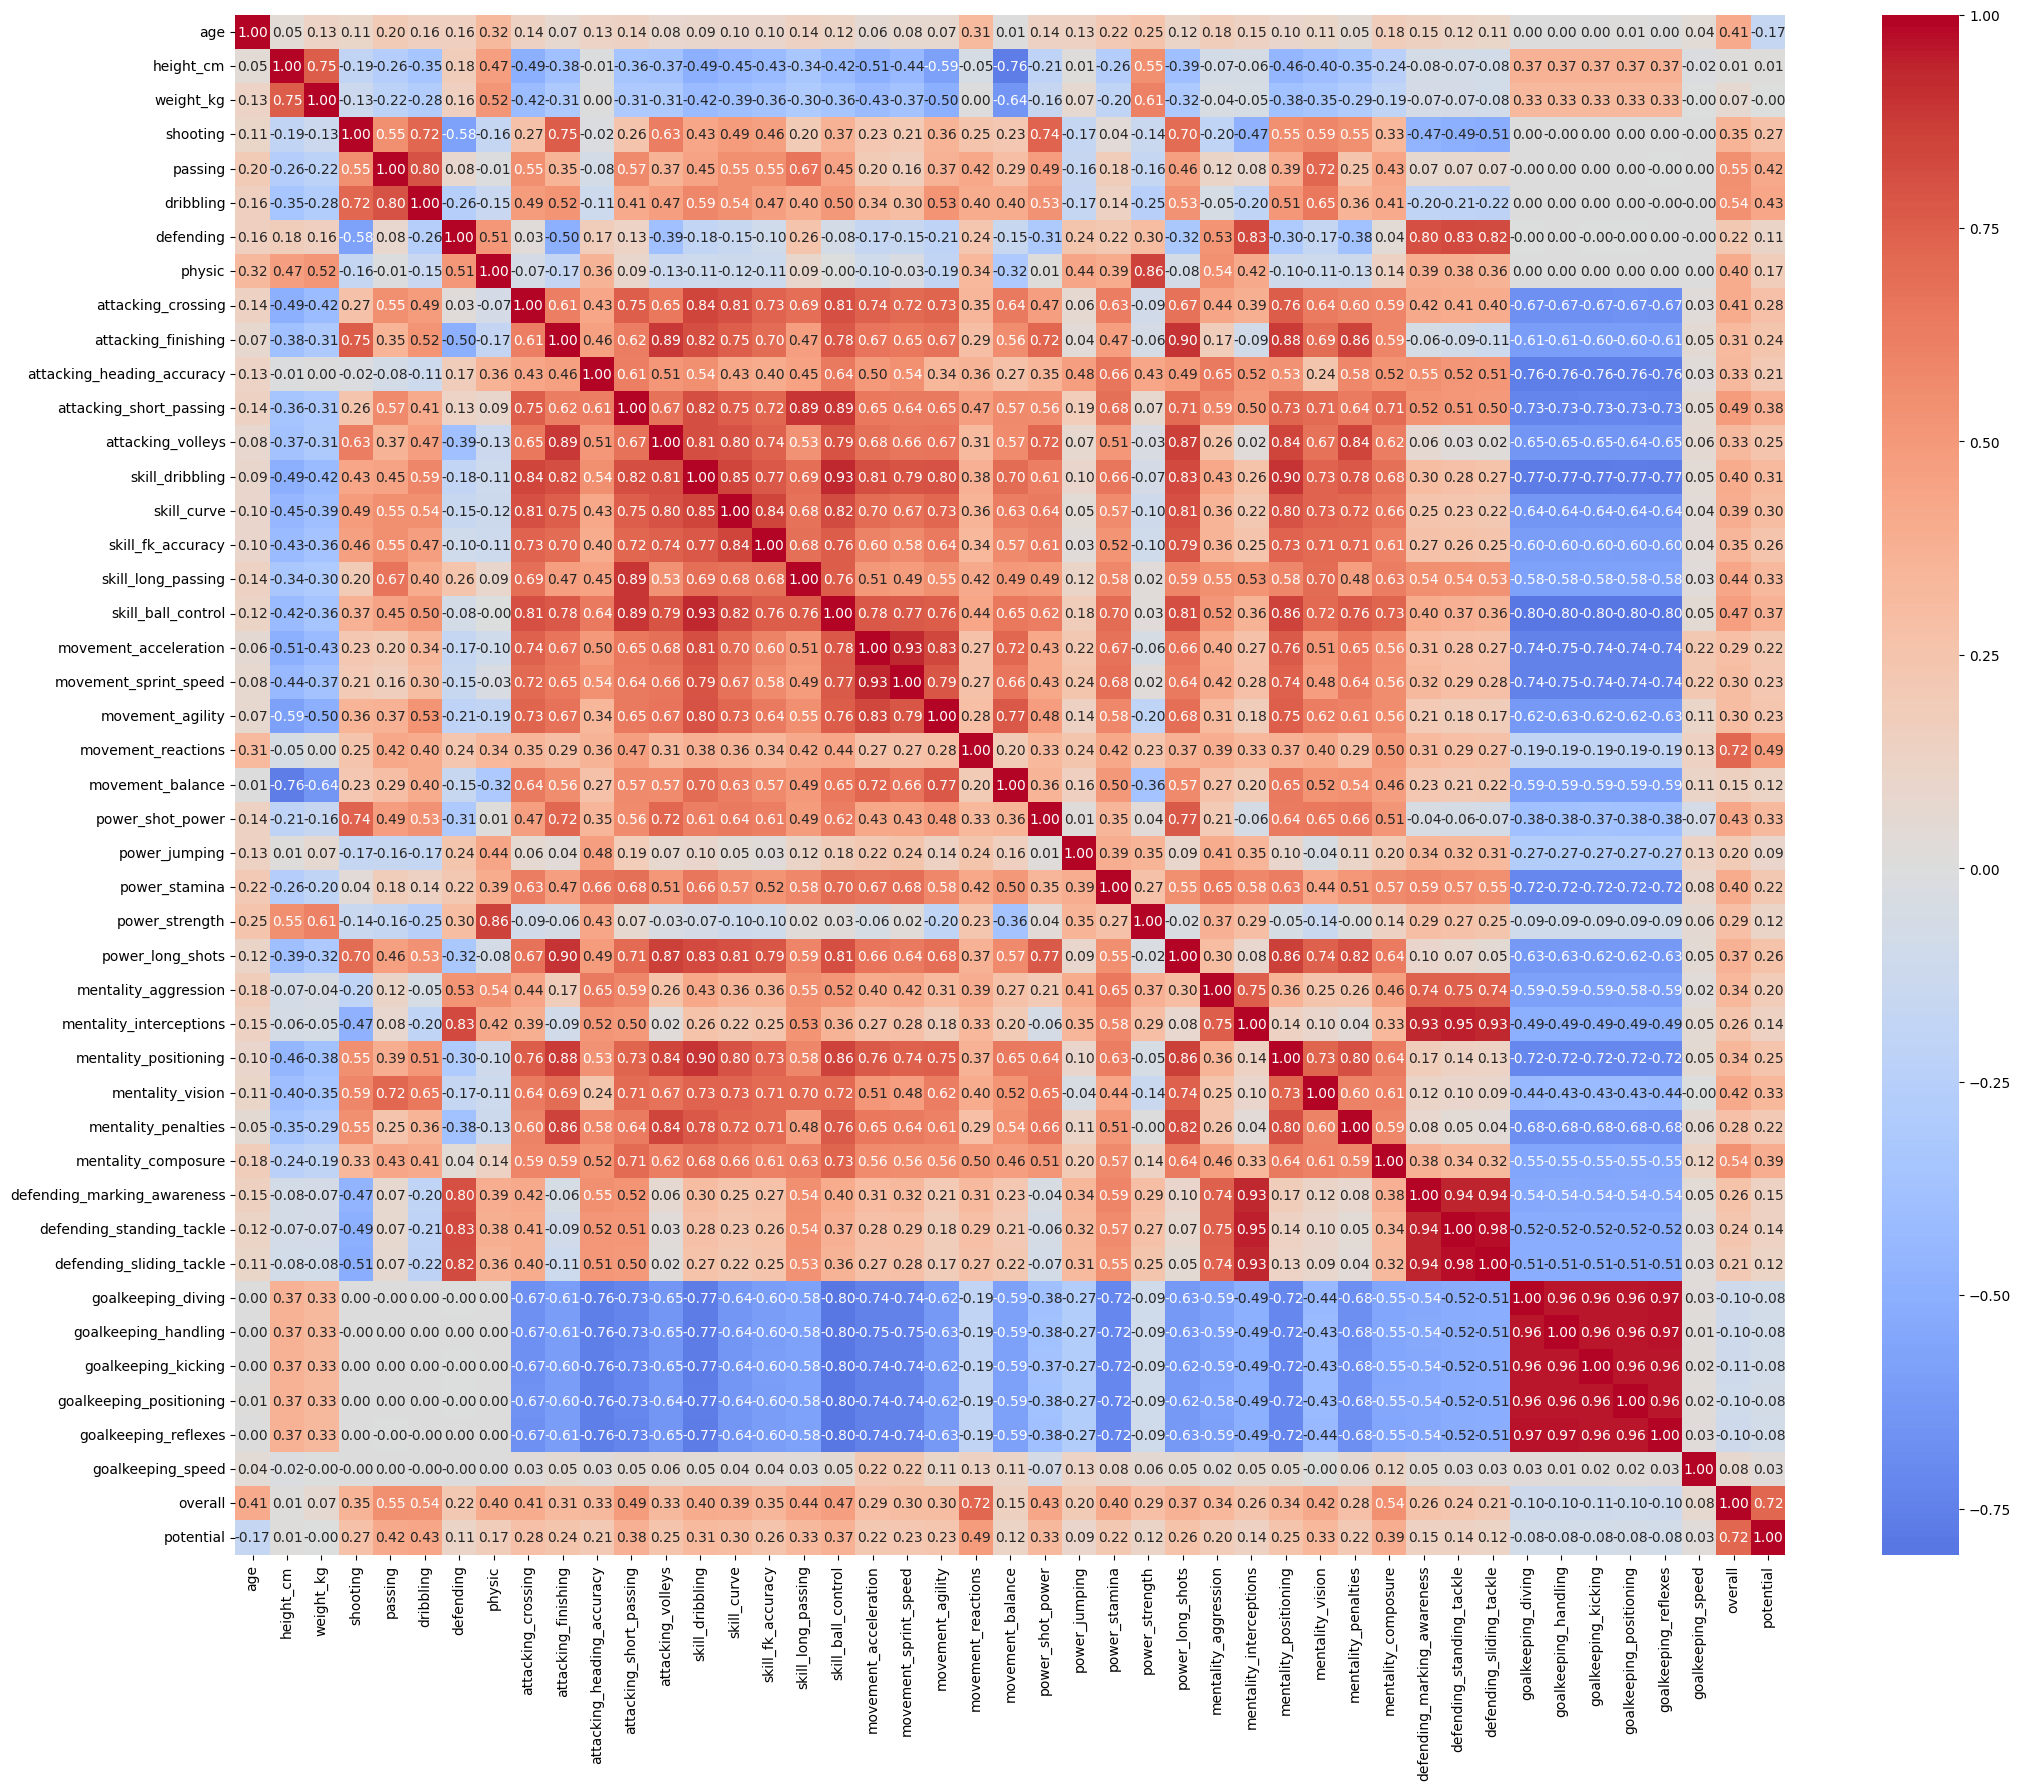

Feature selezionate: ['age', 'passing', 'dribbling', 'attacking_crossing', 'attacking_short_passing', 'skill_long_passing', 'skill_ball_control', 'movement_reactions', 'power_shot_power', 'mentality_vision', 'mentality_composure']


In [ ]:
# Visualizzazione della matrice di correlazione
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo della correlazione
correlation_matrix = df[cols_features + cols_targets].corr()

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

# Selezione feature basate sulla correlazione con gli obiettivi
threshold = 0.4  # Soglia di correlazione
selected_features = [col for col in cols_features if any(abs(correlation_matrix[col][target]) > threshold for target in cols_targets)]
print("Feature selezionate:", selected_features)

---

# **Creazione delle Sequenze e Addestramento del Modello LSTM con Grid Search**

Questa fase del progetto è stata arricchita con l'ottimizzazione dei parametri tramite Grid Search, migliorando ulteriormente il processo di addestramento del modello LSTM. Di seguito i passaggi principali aggiornati:

* **Caricamento del Dataset**: 📥  
  Il dataset preprocessato, `dataset_fifa_15_23_preprocessed.csv`, contenente le statistiche dei calciatori dalle versioni FIFA 15 a FIFA 23, è stato caricato. Questo dataset, già normalizzato, è pronto per essere utilizzato dal modello.

* **Definizione delle Feature e dei Target**: 🎯  
  Abbiamo selezionato le colonne per le feature e i target: le feature includono variabili come età, passaggi, dribbling e altre statistiche rilevanti, mentre i target sono le valutazioni `overall` e `potential` dei calciatori.

* **Creazione delle Finestre Temporali**: ⏳  
  Con la funzione `create_sequences`, abbiamo generato sequenze temporali per ogni giocatore, permettendo al modello di catturare l'evoluzione delle loro prestazioni nel tempo. Se un giocatore ha almeno 9 versioni temporali disponibili, il codice raccoglie i dati delle feature e i corrispondenti target.

* **Divisione dei Dati in Train e Test**: 📊  
  I dati sono stati divisi in un set di addestramento (80%) e un set di test (20%), garantendo che il modello venga valutato su dati non precedentemente visti, fondamentale per validare le sue prestazioni nel mondo reale.

* **Creazione e Compilazione del Modello LSTM**: 🏗️  
  Il modello LSTM è stato creato con due livelli principali: il primo livello LSTM con 64 unità che restituisce sequenze, e il secondo con 32 unità che restituisce l'output finale. Il modello è compilato con l'ottimizzatore **Adam** e utilizza la funzione di perdita **MSE** (errore quadratico medio), ideale per i problemi di regressione.

* **Ottimizzazione dei Parametri tramite Grid Search**: 🔍  
  Per migliorare l'efficacia del modello, abbiamo utilizzato la Grid Search. Questa tecnica ha esplorato diverse combinazioni di parametri (`batch size` e `epochs`) per trovare la configurazione ottimale. In particolare, sono stati testati **batch size** di 32, 64 e 128, e **epochs** di 10, 20 e 50, con una cross-validation a 3 fold. Il modello ottimale ha quindi utilizzato la combinazione di parametri che ha garantito le migliori prestazioni.

* **Addestramento del Modello Ottimizzato**: 📈  
  Utilizzando i parametri ottimali trovati con la Grid Search (epochs = 50, batch_size = 64), il modello è stato addestrato. Durante l'addestramento, abbiamo monitorato la **loss** sia sul training set che sul validation set, prevenendo così fenomeni di overfitting e garantendo una generalizzazione migliore.

* **Valutazione e Salvataggio del Modello**: 📝  
  Il miglior modello ottenuto è stato valutato sui dati di test, e la **loss** finale è stata calcolata. Il modello è stato poi salvato per un eventuale riutilizzo. La valutazione ha fornito un'idea chiara delle prestazioni del modello su dati reali, un passaggio fondamentale prima di procedere con ulteriori miglioramenti.

* **Visualizzazione dei Risultati**: 📊  
  Infine, abbiamo generato un grafico che mostra l'andamento della **loss** durante l'addestramento e la validazione, permettendo di visualizzare le prestazioni del modello e analizzare eventuali miglioramenti da apportare.

---

Con l'aggiunta della **Grid Search**, il processo di addestramento del modello LSTM è stato ottimizzato, portando a una previsione più accurata e robusta delle statistiche dei calciatori.

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.4008 - val_loss: 0.2357
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2410 - val_loss: 0.2094
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2166 - val_loss: 0.1994
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2034 - val_loss: 0.1929
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1952 - val_loss: 0.1880
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1871 - val_loss: 0.1893
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1839 - val_loss: 0.1856
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1757 - val_loss: 0.1840
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1714 - val_loss: 0.1855
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1677 - val_loss: 0.1816
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1634 - val_loss: 0.1787
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1657 - val_l

Test Loss: 0.1688368320465088
Modello salvato come: lstm_model.h5


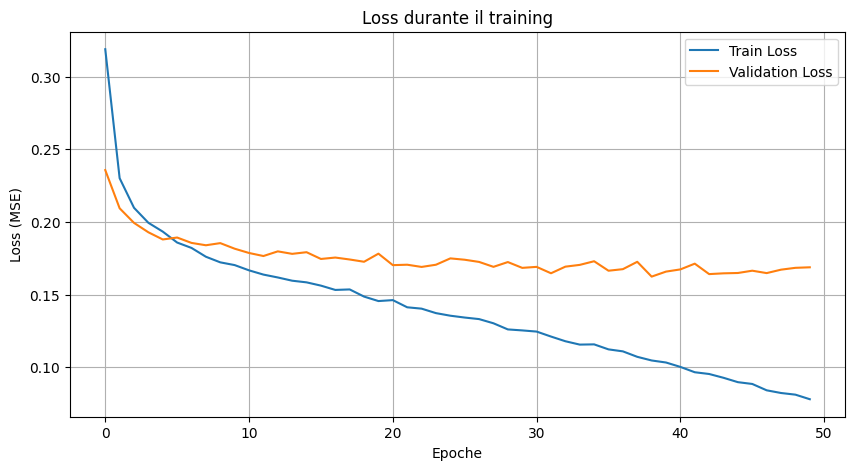

In [12]:
# Caricamento del dataset
df = pd.read_csv('dataset_fifa_15_23_preprocessed.csv')

# Definizione delle colonne da usare per feature e target
cols_features = ['age', 'passing', 'dribbling', 'attacking_crossing', 'attacking_short_passing',
                 'skill_long_passing', 'skill_ball_control', 'movement_reactions', 'power_shot_power',
                 'mentality_vision', 'mentality_composure']
cols_targets = ['overall', 'potential']

# Creazione delle finestre temporali per ogni giocatore
def create_sequences(df, player_col='long_name', time_col='fifa_version', time_steps=9):
    players = df[player_col].unique()
    Xs, ys = [], []

    for player in players:
        player_data = df[df[player_col] == player].sort_values(by=time_col)

        if len(player_data) >= time_steps:
            for i in range(len(player_data) - time_steps):
                Xs.append(player_data[cols_features].iloc[i:i + time_steps].values)
                ys.append(player_data[cols_targets].iloc[i + time_steps].values)

    return np.array(Xs), np.array(ys)

# Creazione delle sequenze
time_steps = 9  # Uso 9 versioni temporali (FIFA 15-23)
X, y = create_sequences(df, time_steps=time_steps)

# Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Nome del file per il salvataggio del modello
model_filename = 'lstm_model.h5'

# Controllo se il modello esiste già
if os.path.exists(model_filename):
    # Carico il modello esistente
    model = load_model(model_filename)
    print("Modello caricato dal file:", model_filename)
else:
    # Creazione del modello LSTM
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(len(cols_targets)))  # Output multivariato

    # Compilazione del modello
    model.compile(optimizer='adam', loss='mse')

    # Addestramento del modello
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

    # Valutazione del modello
    test_loss = model.evaluate(X_test, y_test)
    print("Test Loss:", test_loss)

    # Salvataggio del modello
    model.save(model_filename)
    print("Modello salvato come:", model_filename)

    # Grafici di Loss
    plt.figure(figsize=(10, 5))

    # Grafico della perdita di addestramento e di validazione
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss durante il training')
    plt.xlabel('Epoche')
    plt.ylabel('Loss (MSE)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


In [13]:
# Durante la predizione, utilizza target_scaler per invertire il processo
y_pred = model.predict(X_test)

# Visualizzazione delle prime 5 predizioni
print("Prime 5 predizioni:")
print(y_pred[:5])


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Prime 5 predizioni:
[[-0.8265729  -1.3822235 ]
 [ 0.63507724  0.14506812]
 [-0.10727678  0.8383812 ]
 [-0.42466548  0.34395224]
 [ 0.02624346  0.7418523 ]]
